Step-1 Install and import all necessary libraries in your Jupyter notebook.

In [11]:
#Importing libraries 

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import pylab as pl 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#path setup

path=r"C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7\Execrise 4"

df = pd.read_csv(os.path.join(path, 'Cleaned_Data_MachineLearning.csv'), index_col=False)

In [4]:
df.shape

(8521, 13)

In [5]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,Price_groub,Views Performance
0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,3263,15198.0,Switzerland,Le Landeron (NE),Cheap (less than 44290),Good (more than 170)
1,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,2432,35700.0,Switzerland,Neuenburgersee,Cheap (less than 44290),Good (more than 170)
2,Bowrider,Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,2261,128418.0,Switzerland,Lago Maggiore,Expensive (more than 250000),Good (more than 170)
3,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,2154,949000.0,Other,None,Expensive (more than 250000),Good (more than 170)
4,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,2026,20298.0,Switzerland,Murtensee,Cheap (less than 44290),Good (more than 170)


Step-2 Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
(a). Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [7]:
#Dropping categorical columns

df_un=df.drop(columns = ['Boat Type','Manufacturer','Type','Material','Country','City','Views Performance','Price_groub'])

In [8]:
df_un

,Year Built,Length,Width,Number of views last 7 days,EUR_price
0,1992,7.70,2.46,3263,15198.0
1,1979,11.12,3.88,2432,35700.0
2,2002,12.35,3.48,2261,128418.0
3,2009,20.30,5.20,2154,949000.0
4,1993,6.14,2.34,2026,20298.0
...,...,...,...,...,...
8516,1985,9.99,3.81,19,70000.0
8517,2018,10.36,3.05,18,269041.5
8518,2020,6.41,2.48,18,62800.0
8519,2020,6.41,2.45,15,53900.0


In [9]:
# Step-3 Use the elbow technique as shown in the Jupyter notebook for this Exercise.


num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
# Creates a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_un).score(df_un) for i in range(len(kmeans))] 

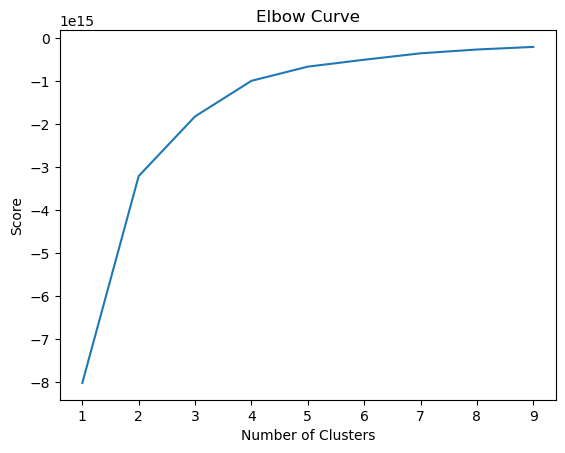

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.savefig("Elbow Curve.png")
pl.show()

In [ ]:
#Step - 4 Make an informed decision about the number of clusters youll use in your k-means algorithm based on the chart.
#(a) Explain why you chose that number in a markdown cell.
#(b)If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions

I've chosen three clusters, acknowledging that clarity diminishes slightly beyond this point, yet the subsequent divisions exhibit a more gradual trend.

In [ ]:
#Step - 5 Run the k-means algorithm.

In [14]:
# Create the k-means object

kmeans = KMeans(n_clusters=3)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_un)

KMeans(n_clusters=3)

Step - 6 Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [16]:
df_un['clusters'] = kmeans.fit_predict(df_un)

In [17]:
df_un

,Year Built,Length,Width,Number of views last 7 days,EUR_price,clusters
0,1992,7.70,2.46,3263,15198.0,0
1,1979,11.12,3.88,2432,35700.0,0
2,2002,12.35,3.48,2261,128418.0,0
3,2009,20.30,5.20,2154,949000.0,0
4,1993,6.14,2.34,2026,20298.0,0
...,...,...,...,...,...,...
8516,1985,9.99,3.81,19,70000.0,0
8517,2018,10.36,3.05,18,269041.5,0
8518,2020,6.41,2.48,18,62800.0,0
8519,2020,6.41,2.45,15,53900.0,0


In [18]:
df_un['clusters'].value_counts()

0    8407
2     106
1       8
Name: clusters, dtype: int64

Step - 7 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

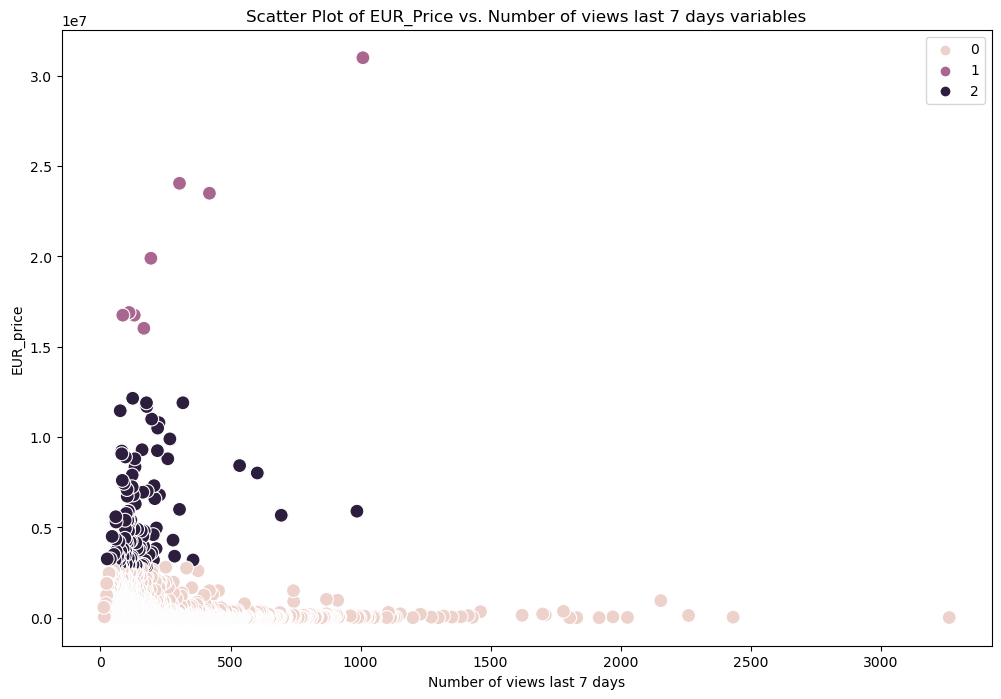

In [30]:
# Plot the clusters for the "EUR_price" and "Number of views last 7 days" variables

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_un['Number of views last 7 days'], y=df_un['EUR_price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of views last 7 days')
plt.ylabel('EUR_price')
plt.title('Scatter Plot of EUR_Price vs. Number of views last 7 days variables')

plt.savefig("Scatter Plot of EUR_price and Number of views last 7 days variables.png")
plt.show()

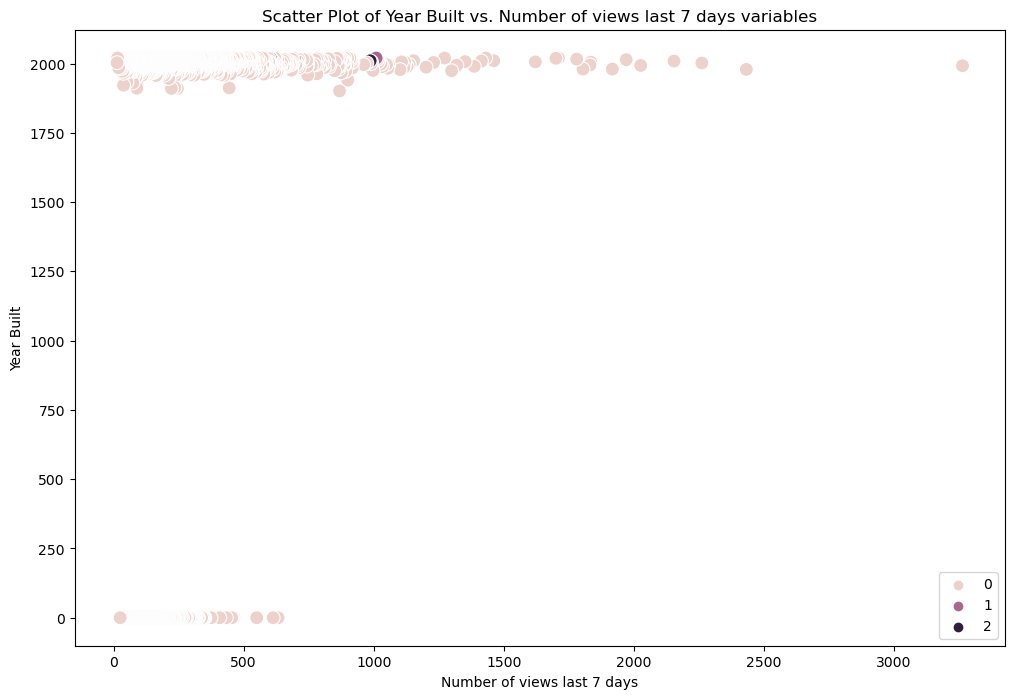

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_un['Number of views last 7 days'], y=df_un['Year Built'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Number of views last 7 days')
plt.ylabel('Year Built')
plt.title('Scatter Plot of Year Built vs. Number of views last 7 days variables')  # Adding a chart title

plt.savefig("Scatter Plot of Year Built vs. Number of views last 7 days variables.png")
plt.show()

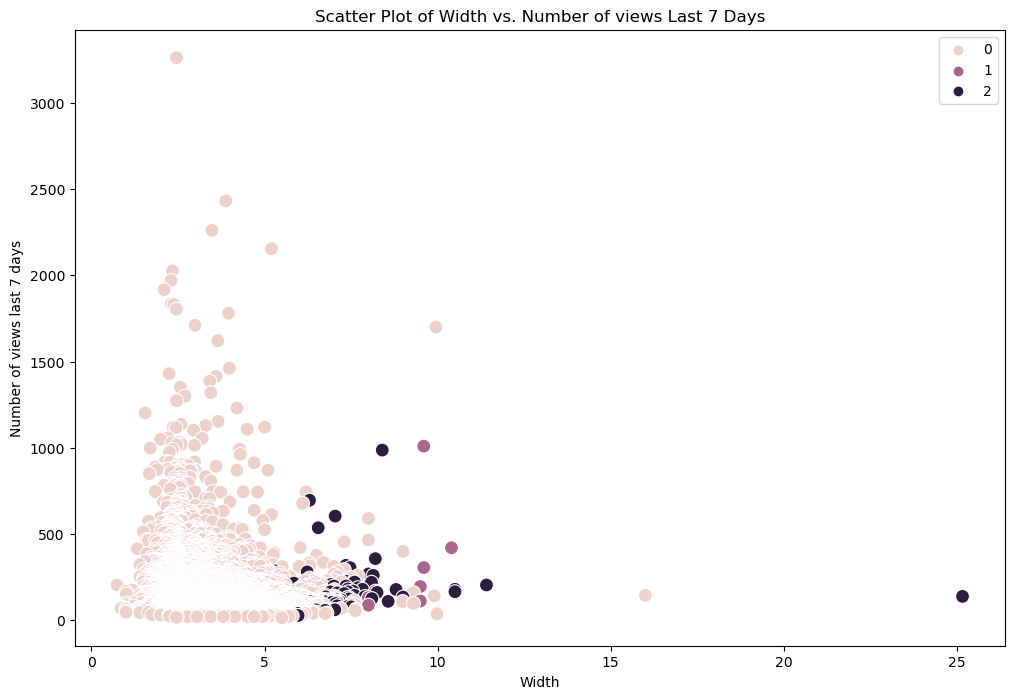

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_un['Width'], y=df_un['Number of views last 7 days'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Width')
plt.ylabel('Number of views last 7 days')
plt.title('Scatter Plot of Width vs. Number of views Last 7 Days')  # Adding a chart title

plt.savefig("Scatter Plot of Width vs. Number of views Last 7 Days.png")
plt.show()

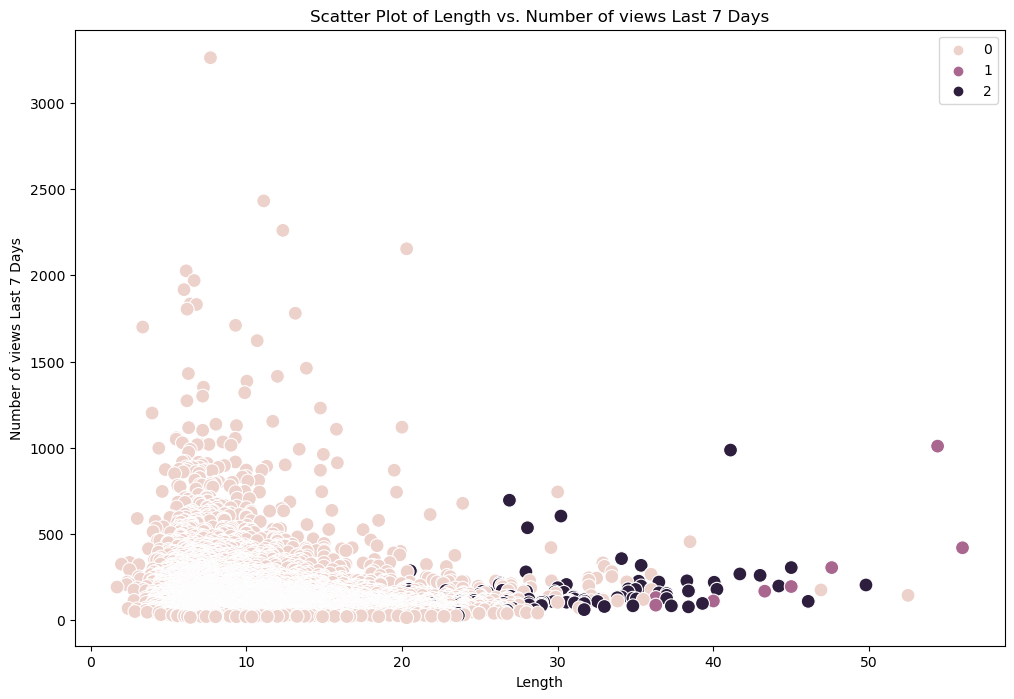

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_un['Length'], y=df_un['Number of views last 7 days'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Length')
plt.ylabel('Number of views Last 7 Days')
plt.title('Scatter Plot of Length vs. Number of views Last 7 Days')  # Adding a chart title
plt.savefig("Scatter Plot of Length vs. Number of views Last 7 Days.png")
plt.show()

Step-8 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The scatter plot reveals a distinct correlation between unit prices in EUR and their corresponding views over the last 7 days. It's evident that more affordable units attract higher viewer engagement, while pricier options receive fewer views, with only a handful surpassing 1000. This emphasizes the significance of affordability in driving user interest and underscores the inverse relationship between price and engagement.

The analysis of length and width indicates that the majority of visits are attributed to smaller boats, particularly those up to 20 feet in size.

Step - 9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [31]:
df_un.loc[df_un['clusters'] == 2, 'cluster'] = 'dark purple'
df_un.loc[df_un['clusters'] == 1, 'cluster'] = 'purple'
df_un.loc[df_un['clusters'] == 0, 'cluster'] = 'pink'

In [34]:
df_un.groupby('cluster').agg({
    'Year Built': ['mean', 'median'],
    'Length': ['mean', 'median'],
    'Width': ['mean', 'median'],
    'Number of views last 7 days': ['mean', 'median'],
    'EUR_price': ['mean', 'median'] })

Year Built             Length            Width         \
                    mean  median       mean median      mean median   
cluster                                                               
dark purple  1975.660377  2016.0  29.984811  28.96  7.083302   6.91   
pink         1888.921970  2008.0  10.900180   9.95  3.409072   3.23   
purple       1513.375000  2020.0  44.862500  44.15  9.100000   9.50   

            Number of views last 7 days            EUR_price              
                                   mean median          mean      median  
cluster                                                                   
dark purple                  157.320755  122.0  5.474945e+06   4700000.0  
pink                         153.356013  109.0  2.160855e+05     90780.0  
purple                       302.375000  180.5  2.060938e+07  18400000.0

The descriptive statistics reveal distinct characteristics among clusters: the 'purple' cluster showcases larger units with higher views and prices, while the 'dark purple' and 'pink' clusters exhibit smaller dimensions and lower engagement. Notably, the 'purple' cluster stands out with the most significant viewer engagement, marked by both a high mean (302) and median (180.5) number of views over the last 7 days, suggesting a potential correlation between size, engagement, and pricing.

Step - 10 Propose what these results could be useful for in future steps of an analytics pipeline.


These results could inform targeted marketing strategies, where units similar to the high-engagement 'purple' cluster could be promoted to capitalize on viewer interest. Moreover, these findings might guide pricing strategies, enabling optimal price adjustments for clusters with varying engagement levels.

In [42]:
file_path = (r'C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7\Execrise 5\Cluster_data.csv')
df_un.to_csv(file_path, index=False)


